# Project Part 2

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

This notebook is intended to serve as a template to complete Part 1 of the projects. Feel free to modify this notebook as needed, but be sure to have the two main parts, a) a introductory proposal section describing what it is your doing to do and where the dataset originates, and b) an exploratory analysis section that has the histograms, charts, tables, etc. that are the output from your exploratory analysis. 

__Note you will want to remove the text above, and in the markdown cells below, and replace it with your own text describing the dataset, task, exploratory steps, etc.__

## Introduction/Background

_In this section you will describe (in English) the dataset you are using as well as the NLP problem it deals with. For example, if you are planning to use the Twitter Natural Disaster dataset, then you will describe what the data and where it came as if you were explaining it to someone who does not know anything about the data. You will then describe how this is a __text classification__ problem, and that the labels are binary (e.g. a tweet either refers to a genuine/real natural disaster, or it does not)._ 

_Overall, this should be about a paragraph of text that could be read by someone outside of our class, and they could still understand what it is your project is doing._ 

_Note that you should __not__ simply write one sentence stating, "This project is base on the Kaggle competition: Predicting Natural Disasters with Twitter._"

_If you are still looking for datasets to use, consider the following resources to explore text datasets._

* https://huggingface.co/datasets
* https://www.kaggle.com/datasets
* https://pytorch.org/text/stable/datasets.html
* https://github.com/niderhoff/nlp-datasets 
* https://medium.com/@ODSC/20-open-datasets-for-natural-language-processing-538fbfaf8e38 
* https://imerit.net/blog/25-best-nlp-datasets-for-machine-learning-all-pbm/ 
* https://index.quantumstat.com/#dataset


## Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [1]:
!pip install pyLDAvis
!pip install textstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import sklearn
import gensim
import pyLDAvis
import wordcloud
import textblob
import spacy
import textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=298fc2dd29cba50c992c5e20184641dab2db3ef4825685b85979969a53eab780
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=16ae108da0928a654221eb0e80894bb6cf903fcd328a2d9f0f96bd7f97f665be
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [23]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('rtom.csv')
tomatoes = data.dropna()
tomatoes.reset_index(inplace=True)
tomatoes.shape
tomatoes.head()

Saving rtom.csv to rtom (3).csv


,index,rotten_tomatoes_link,critic_name,top_critic,Top_Critic,publisher_name,review_type,Review_Type,review_score,review_date,review_content
0,3,m/0814255,Ben McEachen,False,0,Sunday Mail (Australia),Fresh,1,3.5/5,2/9/2010,Whether audiences will get behind The Lightnin...
1,6,m/0814255,Nick Schager,False,1,Slant Magazine,Rotten,0,4-Jan,2/10/2010,Harry Potter knockoffs don't come more transpa...
2,7,m/0814255,Bill Goodykoontz,True,0,Arizona Republic,Fresh,1,3.5/5,2/10/2010,"Percy Jackson isn't a great movie, but it's a ..."
3,8,m/0814255,Jordan Hoffman,False,1,UGO,Fresh,1,B,2/10/2010,"Fun, brisk and imaginative"
4,9,m/0814255,Jim Schembri,True,0,The Age (Australia),Fresh,1,5-Mar,2/10/2010,"Crammed with dragons, set-destroying fights an..."


After loading the data I droped null values which truncates the dataset from 10000 to ~7000

In [28]:
selections = ['Review_Type', 'review_content']
X = tomatoes[selections].copy()
y = X.pop('Review_Type')
print(X.head(5))
print(X.shape)
print(y.value_counts(normalize=True))

                                      review_content
0  Whether audiences will get behind The Lightnin...
1  Harry Potter knockoffs don't come more transpa...
2  Percy Jackson isn't a great movie, but it's a ...
3                         Fun, brisk and imaginative
4  Crammed with dragons, set-destroying fights an...
(7089, 1)
0    0.505431
1    0.494569
Name: Review_Type, dtype: float64


Above I narrowed the data down to Reveiw Type which is either Rotton (50.5%) or Fresh (49.4%) (represented by a zero or a one respectively).

In [30]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = set(stopwords.words('english'))
corpus = []
new = X['review_content'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
from collections import defaultdict

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1


In [35]:
from nltk.tokenize import TreebankWordTokenizer

twt = TreebankWordTokenizer()
X['tokens_raw'] = X['review_content'].apply(lambda x: twt.tokenize(x.lower()))
chars2remove = set(
    ['.', '!', '/', '?', ',', '@', '#', '$', '%', '^', '&', '*', '_', '-', '~', 'The', 'A', '`', '+', "'", '"', '--',
     '[', ']',
     "'s", "n't"])
X['tokens_raw'] = X['tokens_raw'].apply(lambda x: [w for w in x if w not in chars2remove and w not in stop])
pd.set_option("display.max_colwidth", 300)
X_tRaw = X['tokens_raw'].apply(lambda x: [w for w in x if w not in chars2remove and w not in stop])
Xtclean = X_tRaw.apply(lambda x: ' '.join(x))
X_tRaw.head()

0                 [whether, audiences, get, behind, lightning, thief, hard, predict., overall, entertaining, introduction, promising, new, world, consuming, shadow, potter, big, break, free]
1                                                                           [harry, potter, knockoffs, come, transparent, slapdash, wannabe-franchise, jumpstarter, directed, chris, columbus]
2                                                                      [percy, jackson, great, movie, good, one, trotting, kernels, greek, mythology, like, many, disney, channel, references]
3                                                                                                                                                                    [fun, brisk, imaginative]
4    [crammed, dragons, set-destroying, fights, things, exploding, columbus, squeezes, well-meaning, pause, breaks, friendship, absent, fathers, swiftly, moving, next, pyrotechnics, display]
Name: tokens_raw, dtype: object

Tokenized the dataset and removed stopwords.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_hot = tfidf_vect.fit_transform(Xtclean).toarray()

print(X_hot[:3, :5])

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [38]:
import torch
X_tense = torch.tensor(X_hot).float()
print(Xtclean.head())
print(X.shape)

0                  whether audiences get behind lightning thief hard predict. overall entertaining introduction promising new world consuming shadow potter big break free
1                                                                   harry potter knockoffs come transparent slapdash wannabe-franchise jumpstarter directed chris columbus
2                                                                  percy jackson great movie good one trotting kernels greek mythology like many disney channel references
3                                                                                                                                                    fun brisk imaginative
4    crammed dragons set-destroying fights things exploding columbus squeezes well-meaning pause breaks friendship absent fathers swiftly moving next pyrotechnics display
Name: tokens_raw, dtype: object
(7089, 2)


Vectorized the dataset then used torch to put into a onehot encoded tensor.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_tense, y, train_size=0.80, random_state=1)

Split the data then put the training set into a classification class I wrote to run it through a Random Forest model, that is part of this class.

In [40]:
class Classification:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def extraTree(self, n):
        from sklearn.ensemble import ExtraTreesClassifier
        import matplotlib.pyplot as plt
        model = ExtraTreesClassifier()
        model.fit(self.X, self.y)
        feat_importances = pd.Series(model.feature_importances_, index=self.X.columns)
        feat_importances.nlargest(n).plot(kind='barh')
        plt.show()
        feat = []
        feat.append(feat_importances.nlargest(n))
        return feat

    def normal(self, feature):
        import matplotlib.pyplot as plt
        plt.hist(self.X[feature], bins=20, edgecolor='black')
        plt.show()

    def reg(self):
        from sklearn.linear_model import LinearRegression
        import matplotlib.pyplot as plt
        linreg_model = LinearRegression()
        linreg_model.fit(self.X, self.y)
        import statsmodels.api as sm
        regModel = sm.OLS(self.y, self.X).fit()
        y_pred = linreg_model.predict(self.X)
        # and a residual plot
        plt.title('Residulas')
        plt.scatter(regModel.model.exog[:, 1], regModel.resid)
        plt.show()
        mse_linreg = ((y_pred ** 2).mean())
        print("MSE = ", mse_linreg)
        print("rMSE = ", np.sqrt(mse_linreg))
        return regModel.summary()  # finally return a Regression Summary


class DecisionTree(Classification):
    def __init__(self, X, y):
        super().__init__(X, y)

    def decision(self, n, feat):
        from sklearn.tree import DecisionTreeClassifier
        from sklearn import tree
        import matplotlib.pyplot as plt
        clf = tree.DecisionTreeClassifier(max_depth=n)  # set hyperparameter
        clf.fit(self.X, self.y)
        plt.figure(figsize=(12, 12))  # set plot size (denoted in inches)
        tree.plot_tree(clf, feature_names=feat, class_names=True, filled=True, fontsize=10)
        plt.show()


class RandomForest(Classification):
    def __init__(self, X, y):
        super().__init__(X, y)

    def rForestClass(self, n):
        from sklearn.ensemble import RandomForestClassifier
        import matplotlib.pyplot as plt
        from sklearn import metrics
        from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
        clf = RandomForestClassifier(n_estimators=n)
        clf.fit(self.X, self.y)
        y_pred = clf.predict(self.X)
        display = ConfusionMatrixDisplay(confusion_matrix(self.y, y_pred), display_labels=['Fresh', 'Rotten'])
        #display.plot()
        #plt.show()
        print("Accuracy: ", metrics.accuracy_score(self.y, y_pred) * 100, "%")

    def rForestReg(self, n, state):
        from sklearn.ensemble import RandomForestRegressor
        from sklearn import metrics
        regr = RandomForestRegressor(max_depth=n, random_state=state)
        regr.fit(self.X, self.y)
        y_pred = regr.predict(self.X)
        print("Accuracy: ", metrics.accuracy_score(self.y, y_pred))

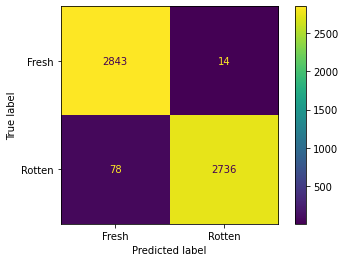

Accuracy:  98.37771116205255 %


In [42]:
rf = RandomForest(X_train, y_train)
rf.rForestClass(10)

After running the data through the training set, the model is apparently 90% accurate...

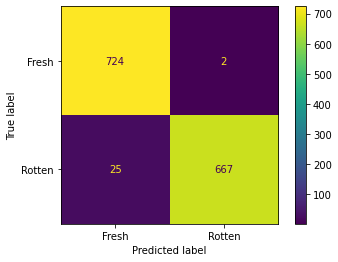

Accuracy:  98.09590973201693 %


In [43]:
rf = RandomForest(X_val, y_val)
rf.rForestClass(10)

So, after running the data through the validation set the model is still 98% accurate, this must be some data.

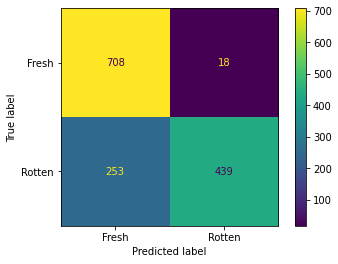

Accuracy:  80.8885754583921 %


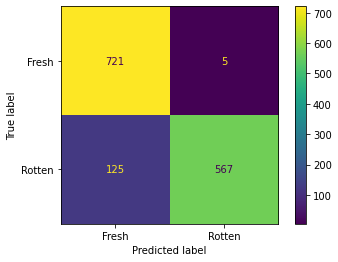

Accuracy:  90.83215796897038 %


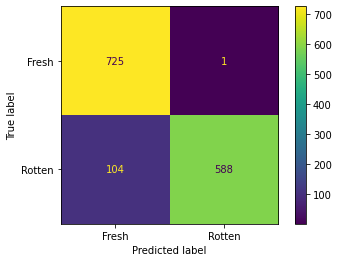

Accuracy:  92.59520451339915 %


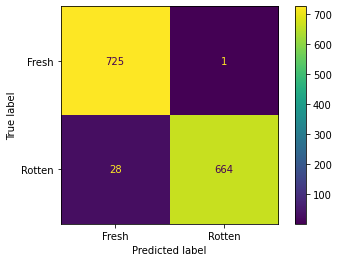

Accuracy:  97.95486600846263 %


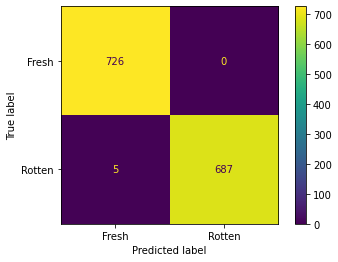

Accuracy:  99.64739069111424 %


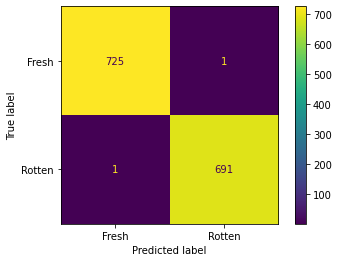

Accuracy:  99.8589562764457 %


In [45]:
rf.rForestClass(2)
rf.rForestClass(4)
rf.rForestClass(6)
rf.rForestClass(10)
rf.rForestClass(20)
rf.rForestClass(40)

Above shows the confustion matrices for many different estimators, as we can see the higher the estimator the higher the accuracy, this is apparently magic data